In [ ]:
'학습 목표 : US(마이크로소프트 , 넷플릭스, 페이스북, 아마존 )와 KR(#삼성, SK하이닉스, 네이버, 카카오)
    '주식 종목으로 포트폴리오 Return, Risk, sharpe ration구성하여 평가후 시각화하기 .
'결과 : US 종목의 포토폴리오 리스크는  아마존과 마이크로소프트는 corr 낮다. 그렇기 때문에 이 둘을 같이 구매하여 리스크를 줄일 수 있다. 
    'KR 종목중 삼성과 카카오를 구매하여 리스크를 줄일 수 있다. 
    '샤프 비율은 US 종목이 KR 비율의 약 2배 이상 높았다. 그만큼 US 종목은 리스크가 높지만 수익성도 그만큼 높다는 것을 알수 있다. 
    

In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [20]:
Tech_US =['MSFT', 'NFLX', 'FB', 'AMZN']   # 마이크로소프트 , 넷플릭스, 페이스북, 아마존 
Tech_KR =['005930.KS','000660.KS','035420.KS', '035720.KS' ] #삼성, SK하이닉스, 네이버, 카카오   

In [36]:
yf.Ticker('005930.KS').history(start='2018-04-01', end='2020-03-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,47829.385558,48044.129738,47341.330604,47380.375000,7115650,0.0,0.0
2018-04-03,46736.139885,46989.928447,46150.473971,46970.406250,12768250,0.0,0.0
2018-04-04,47009.450434,47107.061419,45799.074219,45799.074219,12384200,0.0,0.0
2018-04-05,46267.606560,48200.304050,46209.039970,47575.593750,13245600,0.0,0.0
2018-04-06,46853.274793,47419.418530,46267.608858,47243.718750,12532700,0.0,0.0
...,...,...,...,...,...,...,...
2020-03-24,43850.000000,46950.000000,43050.000000,46950.000000,49801908,0.0,0.0
2020-03-25,48950.000000,49600.000000,47150.000000,48650.000000,52735922,0.0,0.0
2020-03-26,49000.000000,49300.000000,47700.000000,47800.000000,42185129,0.0,0.0


In [71]:
#price, dividends(배당금)를 가져오는 함수 정의
def get_price(companies):
  df=pd.DataFrame()
  for company in companies:
    df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Close']
  return df

def get_div(companies):
  df=pd.DataFrame()
  for company in companies:
    df[company]=yf.Ticker(company).history(start='2018-04-01', end='2020-03-31')['Dividends']
  return df

#US, KR 테크 기업의 주식 가격 
p_US =get_price(Tech_US)
p_US
p_KR = get_price(Tech_KR)
p_KR
p_KR.columns=['SS','SKH','NVR','KKO']
#US, KR 테크기업의 배당금
d_US= get_div(Tech_US)
d_KR= get_div(Tech_KR)
d_KR.columns=['SS', 'SKH', 'NVR', 'KKO']

In [73]:
#한국Tech 기업의 배당금 합
# d_KR.sum
p_KR.sum

<bound method DataFrame.sum of                       SS           SKH            NVR       KKO
Date                                                           
2018-04-02  47380.375000  79270.882812  156585.734375  129000.0
2018-04-03  46970.406250  79758.406250  156585.734375  128500.0
2018-04-04  45799.074219  78393.343750  150402.093750  123500.0
2018-04-05  47575.593750  80830.953125  155388.906250  124500.0
2018-04-06  47243.718750  78295.843750  153593.656250  122500.0
...                  ...           ...            ...       ...
2020-03-24  46950.000000  78700.000000  156000.000000  154500.0
2020-03-25  48650.000000  84500.000000  156000.000000  154500.0
2020-03-26  47800.000000  80700.000000  152500.000000  150500.0
2020-03-27  48300.000000  83300.000000  164000.000000  152500.0
2020-03-30  47850.000000  83700.000000  162500.000000  153000.0

[488 rows x 4 columns]>

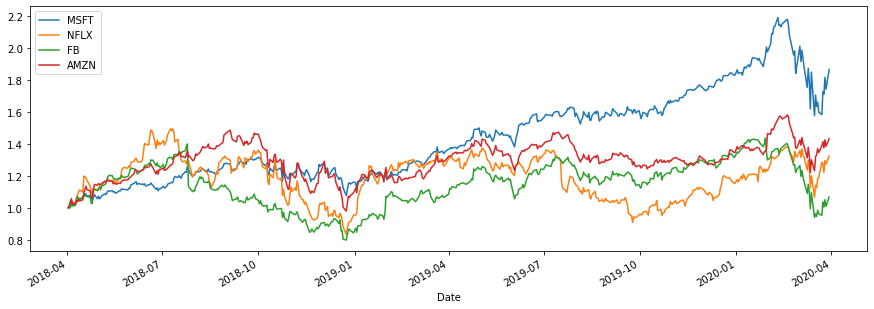

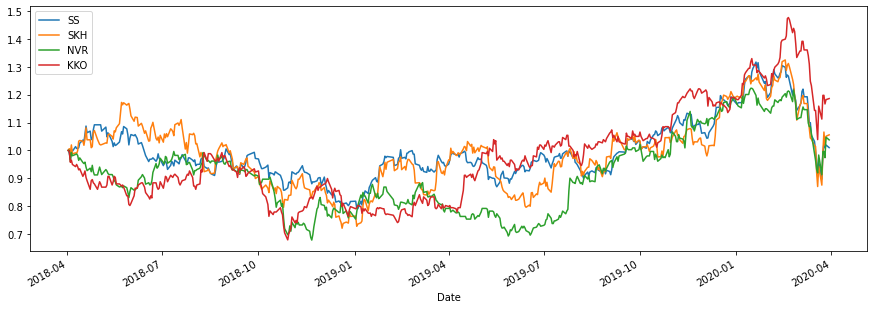

In [42]:
#plotting
#최초 가격대비 성장률 (현재 가격 / 첫음 설정가격)
(p_US/p_US.iloc[0]).plot(figsize=(15,5)) 
(p_KR/p_KR.iloc[0]).plot(figsize = (15,5))
#삼성과 카카오를 같이 삼으로써 리스크를 줄일수 있다. 

In [65]:
# return 계산 
#daily Return
r_US=p_US/p_US.shift()-1 
r_KR=p_KR/p_KR.shift()-1
r_KR

,SS,SKH,NVR,KKO
Date,,,,
2018-04-02,NaN,NaN,NaN,NaN
2018-04-03,-0.008653,0.006150,0.000000,-0.003876
2018-04-04,-0.024938,-0.017115,-0.039490,-0.038911
2018-04-05,0.038789,0.031095,0.033157,0.008097
2018-04-06,-0.006976,-0.031363,-0.011553,-0.016064
...,...,...,...,...
2020-03-24,0.104706,0.134006,0.090909,0.076655
2020-03-25,0.036209,0.073698,0.000000,0.000000
2020-03-26,-0.017472,-0.044970,-0.022436,-0.025890


In [47]:
#Average Return (Total period)
r_a_US=(p_US.iloc[-1]+d_US.sum())/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1

In [66]:
# Averate Return (Daily)(연간 수익률)
r_a_US=(p_US.iloc[-1]+d_US.sum())/p_US.iloc[0]-1
r_a_KR=(p_KR.iloc[-1]+d_KR.sum())/p_KR.iloc[0]-1

In [49]:
# 총 영업일
p_US.shape[0]

503

In [67]:
#Portfolio Returns
#전체 포트폴리오 수익 : weights를 0.25, 0.25, 0.25, 0.25로 투자한 경우를 가정
weights=np.array([0.25, 0.25, 0.25, 0.25])
weights

array([0.25, 0.25, 0.25, 0.25])

In [69]:
#dot(a,b) = a*b
port_return_US = np.dot(weights, r_a_US)
port_return_KR = np.dot(weights, r_a_KR)
port_return_KR

0.08323593590273398

In [53]:
print(port_return_US)
print(port_return_KR)

0.4328286111313813
0.08323593590273398


In [54]:
#portfolio Risk
covar_US= r_US.cov()*252
covar_KR= r_KR.cov()*252

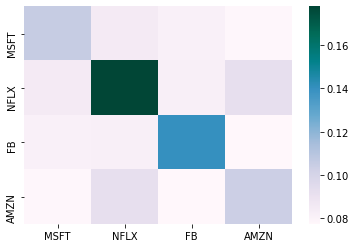

In [58]:

sns.heatmap(covar_US, cmap='PuBuGn')


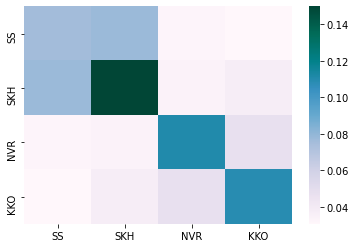

In [57]:
sns.heatmap(covar_KR, cmap='PuBuGn')

In [59]:
port_risk_US= np.dot(weights.T, np.dot(covar_US, weights))
print(port_risk_US)
port_risk_KR= np.dot(weights.T, np.dot(covar_KR, weights))
print(port_risk_KR)

0.0950486057071939
0.06064535105174284


In [60]:
#Sharpe ratio(더 높은 샤프 비율을 나타내는 자산이 동일한 위험에 대해 더 높은 수익률을 제공한다. )
#그러므로 US tech 기업이 높은 샤프 비율을 나타내지만 그만큼 수익성이 높다고 볼수 있다. 
rf=0.02
port_sr_US= (port_return_US-rf)/port_risk_US
port_sr_KR= (port_return_KR-rf)/port_risk_KR
print(port_sr_US)
print(port_sr_KR)

4.3433421043875
1.0427169569647778


In [61]:
#시각화
#                    KR     US 
# Return 
# Risk 
# sharpe ration

In [62]:
result=np.array([[port_return_KR, port_return_US], [port_risk_KR, port_risk_US], [port_sr_KR, port_sr_US]])
result=np.round(result, 3)

In [63]:
result=pd.DataFrame(result)
result.columns=['KR','US']
result.index=['Return', 'Risk', 'Sharpe ratio']
result

,KR,US
Return,0.083,0.433
Risk,0.061,0.095
Sharpe ratio,1.043,4.343


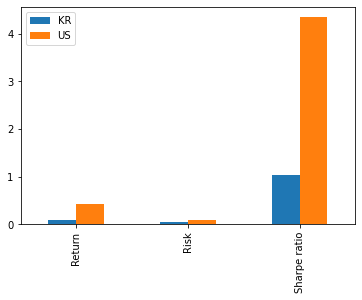

In [74]:
result.plot(kind='bar')